In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
import pandas as pd
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
import nltk.data

In [17]:
train = pd.read_csv( 'data/labeledTrainData.tsv', header=0, delimiter='\t', quoting=3, encoding='utf' )
test = pd.read_csv( 'data/testData.tsv', header=0, delimiter='\t', quoting=3, encoding='utf' )
unlabeled_train = pd.read_csv( 'data/unlabeledTrainData.tsv', header=0, delimiter='\t', quoting=3,  encoding='utf' )

In [16]:
train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [6]:
print "Read {0} labeled train reviews, {1} labeled test reviews, and {2} unlabeled reviews\n".format(
    train["review"].size, test["review"].size, unlabeled_train["review"].size )

Read 25000 labeled train reviews, 25000 labeled test reviews, and 50000 unlabeled reviews



In [9]:
def review_to_wordlist( review, remove_stopwords=False ):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(review).get_text()
    #  
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    #
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    #
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    #
    # 5. Return a list of words
    return(words)

In [12]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [13]:
def review_to_sentences( review, tokenizer, remove_stopwords=False ):
    # Function to split a review into parsed sentences. Returns a 
    # list of sentences, where each sentence is a list of words
    #
    # 1. Use the NLTK tokenizer to split the paragraph into sentences
    raw_sentences = tokenizer.tokenize(review.strip())
    #
    # 2. Loop over each sentence
    sentences = []
    for raw_sentence in raw_sentences:
        # If a sentence is empty, skip it
        if len(raw_sentence) > 0:
            # Otherwise, call review_to_wordlist to get a list of words
            sentences.append( review_to_wordlist( raw_sentence, remove_stopwords ))
    #
    # Return the list of sentences (each sentence is a list of words,
    # so this returns a list of lists
    return sentences

In [18]:
sentences = []  # Initialize an empty list of sentences

print "Parsing sentences from training set"
for review in train["review"]:
    sentences += review_to_sentences(review, tokenizer)

print "Parsing sentences from unlabeled set"
for review in unlabeled_train["review"]:
    sentences += review_to_sentences(review, tokenizer)

Parsing sentences from training set


//anaconda/lib/python2.7/site-packages/bs4/__init__.py:198: UserWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  '"%s" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.' % markup)
//anaconda/lib/python2.7/site-packages/bs4/__init__.py:207: UserWarning: "http://www.happierabroad.com"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client to get the document behind the URL, and feed that document to Beautiful Soup.
  '"%s" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client to get the document behind the URL, and feed that document to Beautiful Soup.' % markup)


Parsing sentences from unlabeled set


//anaconda/lib/python2.7/site-packages/bs4/__init__.py:207: UserWarning: "http://www.archive.org/details/LovefromaStranger"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client to get the document behind the URL, and feed that document to Beautiful Soup.
  '"%s" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client to get the document behind the URL, and feed that document to Beautiful Soup.' % markup)
//anaconda/lib/python2.7/site-packages/bs4/__init__.py:207: UserWarning: "http://www.loosechangeguide.com/LooseChangeGuide.html"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client to get the document behind the URL, and feed that document to Beautiful Soup.
  '"%s" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client to get the document behind the URL, and feed that document to Beautiful Soup.' % markup)
//anaconda/lib/

In [26]:
# Import the built-in logging module and configure it so that Word2Vec 
# creates nice output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print "Training model..."
model = word2vec.Word2Vec(sentences, workers=num_workers, \
            size=num_features, min_count=min_word_count, \
            window=context, sample=downsampling)

print 'Model Trainied'

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "300features_40minwords_10context"
model.save(model_name)

Training model...
Model Trainied


In [27]:
model

In [28]:
model.doesnt_match("man woman child kitchen".split())

'kitchen'

In [29]:
model.doesnt_match("france england germany berlin".split())

'berlin'

In [30]:
model.doesnt_match("paris berlin london austria".split())

'austria'

In [31]:
model.most_similar("man")

[(u'woman', 0.6327335834503174),
 (u'lady', 0.6051585674285889),
 (u'lad', 0.5627248287200928),
 (u'guy', 0.5312333106994629),
 (u'millionaire', 0.5232197642326355),
 (u'monk', 0.5156272649765015),
 (u'sailor', 0.5117502808570862),
 (u'soldier', 0.5106172561645508),
 (u'men', 0.5090273022651672),
 (u'person', 0.5067050457000732)]

In [32]:
model.most_similar("woman")

[(u'lady', 0.6930738687515259),
 (u'prostitute', 0.675645112991333),
 (u'girl', 0.6608179807662964),
 (u'widow', 0.6342782974243164),
 (u'man', 0.6327335834503174),
 (u'heiress', 0.6079725027084351),
 (u'housewife', 0.6012897491455078),
 (u'waitress', 0.5899597406387329),
 (u'nun', 0.5787343978881836),
 (u'nurse', 0.5777239799499512)]

In [33]:
model.most_similar("queen")

[(u'princess', 0.6427208781242371),
 (u'bride', 0.6229053735733032),
 (u'dame', 0.5911622047424316),
 (u'stepmother', 0.5879566073417664),
 (u'belle', 0.5795427560806274),
 (u'duchess', 0.5769729614257812),
 (u'victoria', 0.5723650455474854),
 (u'eva', 0.5720877051353455),
 (u'goddess', 0.5669496059417725),
 (u'maid', 0.5632358193397522)]

In [34]:
model.most_similar("king")

[(u'prince', 0.6447615623474121),
 (u'lion', 0.6027361154556274),
 (u'kingdom', 0.6004096269607544),
 (u'dorff', 0.566501796245575),
 (u'aladdin', 0.5640870928764343),
 (u'stephen', 0.5621935129165649),
 (u'kings', 0.5575608015060425),
 (u'hong', 0.5488128662109375),
 (u'lord', 0.5416520833969116),
 (u'rea', 0.5277429819107056)]

In [35]:
model.most_similar("awful")

[(u'terrible', 0.7790436744689941),
 (u'horrible', 0.7441964745521545),
 (u'atrocious', 0.7340262532234192),
 (u'abysmal', 0.7163137197494507),
 (u'dreadful', 0.6877712607383728),
 (u'horrendous', 0.6856731176376343),
 (u'horrid', 0.6634783744812012),
 (u'appalling', 0.6601183414459229),
 (u'lousy', 0.6267744898796082),
 (u'amateurish', 0.606738269329071)]

In [160]:
model.most_similar('man', topn=50)

[(u'woman', 0.6327335834503174),
 (u'lady', 0.6051585674285889),
 (u'lad', 0.5627248287200928),
 (u'guy', 0.5312333106994629),
 (u'millionaire', 0.5232197642326355),
 (u'monk', 0.5156272649765015),
 (u'sailor', 0.5117502808570862),
 (u'soldier', 0.5106172561645508),
 (u'men', 0.5090273022651672),
 (u'person', 0.5067050457000732),
 (u'farmer', 0.5023829340934753),
 (u'chap', 0.4947691559791565),
 (u'businessman', 0.4944724440574646),
 (u'boy', 0.4940952956676483),
 (u'boxer', 0.4865094721317291),
 (u'doctor', 0.4855862855911255),
 (u'poet', 0.47282707691192627),
 (u'assassin', 0.47220495343208313),
 (u'gigolo', 0.46744322776794434),
 (u'stud', 0.4671333134174347),
 (u'gentleman', 0.4660152494907379),
 (u'loner', 0.4639155864715576),
 (u'lawyer', 0.463655561208725),
 (u'journalist', 0.45906928181648254),
 (u'gambler', 0.4569481909275055),
 (u'priest', 0.4565392732620239),
 (u'policeman', 0.4551057815551758),
 (u'loretta', 0.45207351446151733),
 (u'fisherman', 0.4501734972000122),
 (u'sci

In [36]:
model.most_similar('woman', topn=50)

[(u'lady', 0.6930738687515259),
 (u'prostitute', 0.675645112991333),
 (u'girl', 0.6608179807662964),
 (u'widow', 0.6342782974243164),
 (u'man', 0.6327335834503174),
 (u'heiress', 0.6079725027084351),
 (u'housewife', 0.6012897491455078),
 (u'waitress', 0.5899597406387329),
 (u'nun', 0.5787343978881836),
 (u'nurse', 0.5777239799499512),
 (u'maid', 0.5665031671524048),
 (u'whore', 0.55854332447052),
 (u'women', 0.5570179224014282),
 (u'daughter', 0.5523622035980225),
 (u'loretta', 0.5450217127799988),
 (u'teenager', 0.5394467115402222),
 (u'slut', 0.5304248332977295),
 (u'journalist', 0.5303425788879395),
 (u'herself', 0.5274352431297302),
 (u'socialite', 0.526376485824585),
 (u'sailor', 0.5243158936500549),
 (u'stripper', 0.5220968723297119),
 (u'sexually', 0.5211952924728394),
 (u'lad', 0.5190826654434204),
 (u'patient', 0.5162556767463684),
 (u'person', 0.5158182382583618),
 (u'stud', 0.5134938955307007),
 (u'lover', 0.5096868872642517),
 (u'maria', 0.508490800857544),
 (u'hooker', 0.5

In [39]:
model['woman']

array([ -2.71250750e-03,   5.51074408e-02,  -5.79182357e-02,
         1.12899374e-02,   1.30092204e-01,   6.19434379e-02,
         1.38591537e-02,   2.33911574e-02,   1.08692154e-01,
        -8.12306721e-03,   3.40193287e-02,  -1.06525021e-02,
         4.09555063e-02,   6.25546426e-02,   3.69126834e-02,
         8.01799148e-02,  -6.96953312e-02,   5.86435664e-03,
        -1.33251816e-01,  -5.84867038e-02,  -3.59809622e-02,
        -3.34324874e-02,   1.60039477e-02,   7.84007758e-02,
         5.86162210e-02,  -4.96456921e-02,  -5.60594760e-02,
        -5.25672622e-02,   7.29696685e-03,   6.21845759e-02,
        -2.12517157e-02,   1.21844932e-02,   4.14985307e-02,
        -6.79583699e-02,  -4.91063520e-02,   3.97513695e-02,
         3.68263908e-02,   6.90318644e-02,   1.04710765e-01,
         9.27047729e-02,  -2.33767144e-02,   4.42443714e-02,
         6.71995953e-02,  -3.83549444e-02,  -1.53195923e-02,
        -2.95798071e-02,   1.51816308e-02,   5.89467324e-02,
        -8.14727023e-02,

In [44]:
model.syn0.shape

(16490, 300)

In [49]:
from sklearn.manifold import LocallyLinearEmbedding

In [50]:
lle = LocallyLinearEmbedding(n_components=2, random_state=42)

In [51]:
lle.fit(model.syn0)

LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=100,
            method='standard', modified_tol=1e-12, n_components=2,
            n_neighbors=5, neighbors_algorithm='auto', random_state=42,
            reg=0.001, tol=1e-06)

In [59]:
import seaborn as sns

In [58]:
woman_similiar = np.zeros((50, 2), dtype=np.float64)
man_similiar = np.zeros((50, 2), dtype=np.float64)

In [92]:
def get_most_sim_matrix(word, topn):
    arr = np.zeros((topn, 2))
    for i, sim_tup in enumerate(model.most_similar(word, topn=topn)):
        word = sim_tup[0]
        arr[i] = lle.transform(model[word].reshape((1, -1)))
    
    return arr

In [169]:
respect_similiar = get_most_sim_matrix('respect', 10)
woman_similiar = get_most_sim_matrix('woman', 10)
man_similiar = get_most_sim_matrix('man', 10)

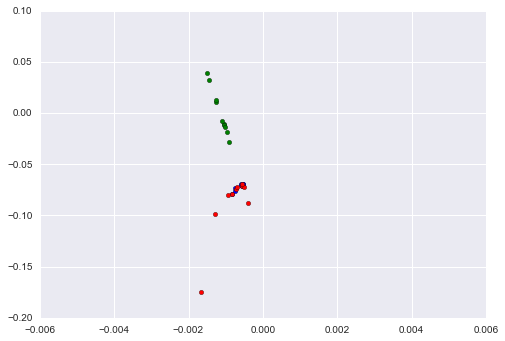

In [170]:
plt.scatter(woman_similiar[:, 0] * 100, woman_similiar[0:, 1] * 100, c='b')
plt.scatter(man_similiar[:, 0] * 100, man_similiar[0:, 1] * 100, c='r')
plt.scatter(respect_similiar[:, 0] * 100, respect_similiar[0:, 1] * 100, c='g')

In [126]:
woman_similiar = get_most_sim_matrix('woman', 10)

array([[-0.00084141, -0.07883704],
       [-0.00057655, -0.0693732 ],
       [-0.00074636, -0.07340247],
       [-0.00055424, -0.07012056],
       [-0.00075771, -0.07572083],
       [-0.00056773, -0.07069865],
       [-0.00058392, -0.06998894],
       [-0.0005439 , -0.0696785 ],
       [-0.00054674, -0.07014016],
       [-0.00054649, -0.06963642],
       [-0.00057533, -0.06966182],
       [-0.00056351, -0.06880525],
       [-0.0013042 , -0.09887406],
       [-0.00057341, -0.06994229],
       [-0.00058062, -0.06993554],
       [-0.00102723, -0.08122954],
       [-0.00058763, -0.06748473],
       [-0.0005574 , -0.07142118],
       [-0.00056514, -0.06864979],
       [-0.000571  , -0.06992995],
       [-0.00054983, -0.06961635],
       [-0.00055785, -0.06793182],
       [-0.00061188, -0.06413515],
       [-0.00068386, -0.07178325],
       [-0.00054493, -0.07021094],
       [-0.00165976, -0.17490045],
       [-0.00057836, -0.06964238],
       [-0.00053514, -0.07017574],
       [-0.00057559,

In [114]:
man_similiar.min()

-0.001749004530322427

In [115]:
man_similiar.max()

-3.9368493778553042e-06

In [116]:
woman_similiar.max()

-5.0832526533432722e-06